In [ ]:
!pip install numpy==1.19.5

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import KFold
import datetime
import keras
import tensorflow as tf
from keras import backend as K
import random
from matplotlib import pyplot as plt

In [ ]:
n_split = 10
SEQUENCE_LENGTH = 25

DATA_PATH = '/content/drive/MyDrive/Dissertation/data/project/LSTM_Data/'

SPONGE_CLASSIFICATIONS = np.array(['no_object', 'soft', 'medium', 'firm', 'very_firm'])
label_map = {label: num for num, label in enumerate(SPONGE_CLASSIFICATIONS)}

sequences, labels = [], []

# Create arrays with all the data

In [ ]:
for action in SPONGE_CLASSIFICATIONS:
    print(action)
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(SEQUENCE_LENGTH):
            res = np.load(os.path.join(DATA_PATH, action, str(
                sequence), "{}.npy".format(frame_num)))
            window.append(res.flatten())
            #print(res)
        sequences.append(window)
        #print(window)
        labels.append(label_map[action])   

no_object
soft
medium
firm
very_firm


# Define the LSTM model

In [ ]:
X = np.array(sequences)
print(X.shape)

y = to_categorical(labels).astype(int)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

def create_model(learning_rate):
    model = Sequential()
    model.add(LSTM(64, return_sequences=True,
                   activation='relu', input_shape=(SEQUENCE_LENGTH, 480*640)))
    model.add(LSTM(128, return_sequences=True, activation='relu'))
    model.add(LSTM(64, return_sequences=False, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(SPONGE_CLASSIFICATIONS.shape[0], activation='softmax'))

    optimizer = tf.keras.optimizers.Adam(lr=learning_rate)
    #optimizer = "Adam"
    model.compile(optimizer=optimizer, loss='categorical_crossentropy',
                  metrics=['categorical_accuracy'])

    return model



(75, 25, 307200)


# Sanity check


In [ ]:
test_sequence = []

video_number = random.randint(0, 14)
res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))

for action in SPONGE_CLASSIFICATIONS:
    print(action)
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(SEQUENCE_LENGTH):
            res = np.load(os.path.join(DATA_PATH, action, str(
                sequence), "{}.npy".format(frame_num)))
            window.append(res.flatten())
            #print(res)
        sequences.append(window)
        #print(window)
        labels.append(label_map[action])   

#Sanity check, view few sequences
image_number = random.randint(0, SEQUENCE_LENGTH - 3)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title('Sequence Number: ' + str(image_number))
plt.imshow(X[image_number], cmap='gray')
plt.subplot(122)
plt.title('Sequence Number: ' + str(image_number + 1))
plt.imshow(X[image_number + 1], cmap='gray')
plt.subplot(123)
plt.title('Sequence Number: ' + str(image_number + 2))
plt.imshow(X[image_number + 2], cmap='gray')


plt.show()

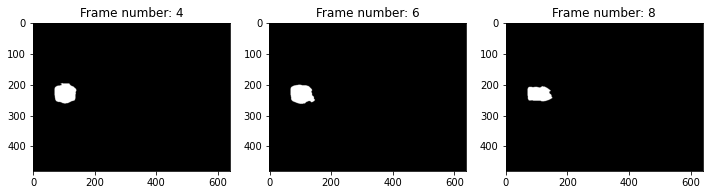

In [ ]:
test_sequence = []

video_number = random.randint(0, 14)
for frame_num in range(4,9,2):
  res = np.load(os.path.join(DATA_PATH, "firm", str(video_number), "{}.npy".format(frame_num)))
  test_sequence.append(res)

plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.title('Frame number: 4')
plt.imshow(test_sequence[0], cmap='gray')
plt.subplot(132)
plt.title('Frame number: 6')
plt.imshow(test_sequence[1], cmap='gray')
plt.subplot(133)
plt.title('Frame number: 8')
plt.imshow(test_sequence[2], cmap='gray')


plt.show()


# Train the model


In [ ]:
training_num = 109

bs = 16

x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.5, random_state = 0)

training_folder_path = "training_" + str(training_num) + "/"

os.mkdir("/content/drive/MyDrive/Dissertation/checkpoints/project/LSTM/" + training_folder_path)
os.mkdir("/content/drive/MyDrive/Dissertation/logs/project/LSTM/" + training_folder_path)
os.mkdir("/content/drive/MyDrive/Dissertation/saved_models/project/LSTM/"+ training_folder_path)

model = create_model(0.0001)

test_version = "bs_8_st_1_lr_0.0001_1"
checkpoint_path = training_folder_path + test_version + "/" + "cp.ckpt"
checkpoint_dir = os.path.join("/content/drive/MyDrive/Dissertation/checkpoints/project/LSTM/", checkpoint_path)
log_dir = "/content/drive/MyDrive/Dissertation/logs/project/LSTM/" + training_folder_path + test_version + "/"

tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir)
cp_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_dir,save_weights_only=True, save_best_only=True, verbose=1)

history = model.fit(x_train, y_train, batch_size=bs, validation_data=(x_val, y_val), steps_per_epoch=1,validation_steps=1,epochs=300,callbacks=[tensorboard_callback, cp_callback])
#evaluation = model.evaluate(X_test, Y_test)

model = create_model(0.0001)

test_version = "bs_8_st_1_lr_0.0001_2"
checkpoint_path = training_folder_path + test_version + "/" + "cp.ckpt"
checkpoint_dir = os.path.join("/content/drive/MyDrive/Dissertation/checkpoints/project/LSTM/", checkpoint_path)
log_dir = "/content/drive/MyDrive/Dissertation/logs/project/LSTM/" + training_folder_path + test_version + "/"

tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir)
cp_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_dir,save_weights_only=True, save_best_only=True, verbose=1)

history = model.fit(x_train, y_train, batch_size=bs, validation_data=(x_val, y_val), steps_per_epoch=1,validation_steps=1,epochs=300,callbacks=[tensorboard_callback, cp_callback])
#evaluation = model.evaluate(X_test, Y_test)

model = create_model(0.0001)

test_version = "bs_8_st_1_lr_0.0001_3"
checkpoint_path = training_folder_path + test_version + "/" + "cp.ckpt"
checkpoint_dir = os.path.join("/content/drive/MyDrive/Dissertation/checkpoints/project/LSTM/", checkpoint_path)
log_dir = "/content/drive/MyDrive/Dissertation/logs/project/LSTM/" + training_folder_path + test_version + "/"

tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir)
cp_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_dir,save_weights_only=True, save_best_only=True, verbose=1)

history = model.fit(x_train, y_train, batch_size=bs, validation_data=(x_val, y_val), steps_per_epoch=1,validation_steps=1,epochs=300,callbacks=[tensorboard_callback, cp_callback])
#evaluation = model.evaluate(X_test, Y_test)

model = create_model(0.0001)

test_version = "bs_8_st_1_lr_0.0001_4"
checkpoint_path = training_folder_path + test_version + "/" + "cp.ckpt"
checkpoint_dir = os.path.join("/content/drive/MyDrive/Dissertation/checkpoints/project/LSTM/", checkpoint_path)
log_dir = "/content/drive/MyDrive/Dissertation/logs/project/LSTM/" + training_folder_path + test_version + "/"

tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir)
cp_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_dir,save_weights_only=True, save_best_only=True, verbose=1)

history = model.fit(x_train, y_train, batch_size=bs, validation_data=(x_val, y_val), steps_per_epoch=1,validation_steps=1,epochs=300,callbacks=[tensorboard_callback, cp_callback])
#evaluation = model.evaluate(X_test, Y_test)

model = create_model(0.0001)

test_version = "bs_8_st_1_lr_0.0001_5"
checkpoint_path = training_folder_path + test_version + "/" + "cp.ckpt"
checkpoint_dir = os.path.join("/content/drive/MyDrive/Dissertation/checkpoints/project/LSTM/", checkpoint_path)
log_dir = "/content/drive/MyDrive/Dissertation/logs/project/LSTM/" + training_folder_path + test_version + "/"

tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir)
cp_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_dir,save_weights_only=True, save_best_only=True, verbose=1)

history = model.fit(x_train, y_train, batch_size=bs, validation_data=(x_val, y_val), steps_per_epoch=1,validation_steps=1,epochs=300,callbacks=[tensorboard_callback, cp_callback])
#evaluation = model.evaluate(X_test, Y_test)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Streaming output truncated to the last 5000 lines.
Epoch 254/300
1/1 [==============================] - ETA: 0s - loss: 5.6842 - categorical_accuracy: 0.5000
Epoch 00254: val_loss did not improve from 0.10244
1/1 [==============================] - 1s 659ms/step - loss: 5.6842 - categorical_accuracy: 0.5000 - val_loss: 8.6400 - val_categorical_accuracy: 0.3750
Epoch 255/300
1/1 [==============================] - ETA: 0s - loss: 10.5899 - categorical_accuracy: 0.2500
Epoch 00255: val_loss did not improve from 0.10244
1/1 [==============================] - 1s 635ms/step - loss: 10.5899 - categorical_accuracy: 0.2500 - val_loss: 9.9413 - val_categorical_accuracy: 0.3125
Epoch 256/300
1/1 [==============================] - ETA: 0s - loss: 6.2660 - categorical_accuracy: 0.4286
Epoch 00256: val_loss did not improve from 0.10244
1/1 [==============================] - 1s 642ms/step - loss: 6.2660 - categorical_accuracy: 0.4286 - val_loss: 11.6707 - val_categorical_accuracy: 0.3125
Epoch 257/300

# Evaluation

In [ ]:
training_num = 109
model = create_model(0.0001)

import sklearn as sk

training_folder_path = "training_" + str(training_num) + "/"

test_version = "bs_8_st_1_lr_0.0001_1"
print("\n\nEVALUATION FOR: " + test_version)
checkpoint_path = training_folder_path  + test_version + "/" + "cp.ckpt"
model.load_weights("/content/drive/MyDrive/Dissertation/checkpoints/project/LSTM/" + checkpoint_path)
evaluation = model.evaluate(X_test, Y_test)
yhat = model.predict(X_test)
ytrue = np.argmax(Y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()
print(multilabel_confusion_matrix(ytrue, yhat))
print(accuracy_score(ytrue, yhat))
print(classification_report(ytrue,yhat))


test_version = "bs_8_st_1_lr_0.0001_2"
print("\n\nEVALUATION FOR: " + test_version)
checkpoint_path = training_folder_path  + test_version + "/" + "cp.ckpt"
model.load_weights("/content/drive/MyDrive/Dissertation/checkpoints/project/LSTM/" + checkpoint_path)
evaluation = model.evaluate(X_test, Y_test)
yhat = model.predict(X_test)
ytrue = np.argmax(Y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()
print(multilabel_confusion_matrix(ytrue, yhat))
print(accuracy_score(ytrue, yhat))
print(classification_report(ytrue,yhat))

test_version = "bs_8_st_1_lr_0.0001_3"
print("\n\nEVALUATION FOR: " + test_version)
checkpoint_path = training_folder_path  + test_version + "/" + "cp.ckpt"
model.load_weights("/content/drive/MyDrive/Dissertation/checkpoints/project/LSTM/" + checkpoint_path)
evaluation = model.evaluate(X_test, Y_test)
yhat = model.predict(X_test)
ytrue = np.argmax(Y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()
print(multilabel_confusion_matrix(ytrue, yhat))
print(accuracy_score(ytrue, yhat))
print(classification_report(ytrue,yhat))

test_version = "bs_8_st_1_lr_0.0001_4"
print("\n\nEVALUATION FOR: " + test_version)
checkpoint_path = training_folder_path  + test_version + "/" + "cp.ckpt"
model.load_weights("/content/drive/MyDrive/Dissertation/checkpoints/project/LSTM/" + checkpoint_path)
evaluation = model.evaluate(X_test, Y_test)
yhat = model.predict(X_test)
ytrue = np.argmax(Y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()
print(multilabel_confusion_matrix(ytrue, yhat))
print(accuracy_score(ytrue, yhat))
print(classification_report(ytrue,yhat))

test_version = "bs_8_st_1_lr_0.0001_5"
print("\n\nEVALUATION FOR: " + test_version)
checkpoint_path = training_folder_path  + test_version + "/" + "cp.ckpt"
model.load_weights("/content/drive/MyDrive/Dissertation/checkpoints/project/LSTM/" + checkpoint_path)
evaluation = model.evaluate(X_test, Y_test)
yhat = model.predict(X_test)
ytrue = np.argmax(Y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()
print(multilabel_confusion_matrix(ytrue, yhat))
print(accuracy_score(ytrue, yhat))
print(classification_report(ytrue,yhat))



EVALUATION FOR: bs_8_st_1_lr_0.0001_1


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 1s/step - loss: 4.2631 - categorical_accuracy: 0.7333
[[[14  0]
  [ 0  1]]

 [[11  1]
  [ 0  3]]

 [[10  0]
  [ 3  2]]

 [[ 9  2]
  [ 1  3]]

 [[12  1]
  [ 0  2]]]
0.7333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.75      1.00      0.86         3
           2       1.00      0.40      0.57         5
           3       0.60      0.75      0.67         4
           4       0.67      1.00      0.80         2

    accuracy                           0.73        15
   macro avg       0.80      0.83      0.78        15
weighted avg       0.80      0.73      0.71        15



EVALUATION FOR: bs_8_st_1_lr_0.0001_2
1/1 [==============================] - 0s 311ms/step - loss: 5.1233 - categorical_accuracy: 0.8000
[[[14  0]
  [ 0  1]]

 [[10  2]
  [ 0  3]]

 [[10  0]
  [ 3  2]]

 [[10  1]
  [ 0  4]]

 [[13  0]
  [ 0  2]]]
0.8
              precision    recall

# Other code:

In [ ]:
training_num = 25

training_folder_path = "training_" + str(training_num) + "/"
checkpoint_path = training_folder_path + "cp.ckpt"

checkpoint_dir = os.path.join("/content/drive/MyDrive/Dissertation/checkpoints/project/LSTM/", checkpoint_path)
log_dir = "/content/drive/MyDrive/Dissertation/logs/project/LSTM/" + training_folder_path + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir)

cp_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_dir,save_weights_only=True, save_best_only=True, verbose=1)

## Create Directories

In [ ]:
os.mkdir("/content/drive/MyDrive/Dissertation/checkpoints/project/LSTM/" + training_folder_path)
os.mkdir("/content/drive/MyDrive/Dissertation/logs/project/LSTM/" + training_folder_path)
os.mkdir("/content/drive/MyDrive/Dissertation/saved_models/project/LSTM/"+ training_folder_path)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.5)

model = create_model()

history = model.fit(x_train, y_train, batch_size=8, validation_data=(x_val, y_val), steps_per_epoch=3,validation_steps=3,epochs=200,callbacks=[tensorboard_callback, cp_callback])


In [ ]:
steps_per_epoch = len(x_val)//8
print(steps_per_epoch)

3


In [ ]:
evaluation = model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 324ms/step - loss: 12.9139 - categorical_accuracy: 0.2667


In [ ]:
yhat = model.predict(X_test)
ytrue = np.argmax(Y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

print(multilabel_confusion_matrix(ytrue, yhat))
print(accuracy_score(ytrue, yhat))

[[[ 9  4]
  [ 0  2]]

 [[ 5  6]
  [ 2  2]]

 [[11  0]
  [ 4  0]]

 [[13  0]
  [ 2  0]]

 [[11  1]
  [ 3  0]]]
0.26666666666666666


In [ ]:
best_model = create_model()
best_accuracy = 0

for train_index, test_index in KFold(n_split, shuffle=True).split(X_train):
    x_train, x_test = X_train[train_index], X_train[test_index]
    y_train, y_test = Y_train[train_index], Y_train[test_index]

    model = create_model()
    model.fit(x_train, y_train, epochs=5, callbacks=[tensorboard_callback, cp_callback])

    evaluation = model.evaluate(x_test, y_test)
    accuracy = evaluation[1]
    loss = evaluation[0]

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        print('This model performed better')

Epoch 1/5
2/2 [==============================] - 6s 110ms/step - loss: 1.5881 - categorical_accuracy: 0.2593
Epoch 2/5
2/2 [==============================] - 0s 101ms/step - loss: 1.5468 - categorical_accuracy: 0.2963
Epoch 3/5
2/2 [==============================] - 0s 97ms/step - loss: 1.6803 - categorical_accuracy: 0.1667
Epoch 4/5
2/2 [==============================] - 0s 88ms/step - loss: 1.4927 - categorical_accuracy: 0.2778
Epoch 5/5
1/1 [==============================] - 1s 599ms/step - loss: 1.6781 - categorical_accuracy: 0.3333
This model performed better
Epoch 1/5
2/2 [==============================] - 4s 88ms/step - loss: 1.6485 - categorical_accuracy: 0.1852
Epoch 2/5
2/2 [==============================] - 0s 107ms/step - loss: 1.6951 - categorical_accuracy: 0.4444
Epoch 3/5
2/2 [==============================] - 0s 107ms/step - loss: 1.5740 - categorical_accuracy: 0.3333
Epoch 4/5
2/2 [==============================] - 0s 92ms/step - loss: 1.4430 - categorical_accuracy: 0.

# Model summary and performance on the test set

In [ ]:

print('\n\nBest Model Evaluation:\n\n')
print(best_model.summary())

#best_model.save('models/lstm_model_2.h5')

yhat = best_model.predict(X_test)
ytrue = np.argmax(Y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

print(multilabel_confusion_matrix(ytrue, yhat))
print(accuracy_score(ytrue, yhat))




Best Model Evaluation:


Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_93 (LSTM)              (None, 5, 64)             78659840  
                                                                 
 lstm_94 (LSTM)              (None, 5, 128)            98816     
                                                                 
 lstm_95 (LSTM)              (None, 64)                49408     
                                                                 
 dense_93 (Dense)            (None, 64)                4160      
                                                                 
 dense_94 (Dense)            (None, 32)                2080      
                                                                 
 dense_95 (Dense)            (None, 5)                 165       
                                                                 
Total params: 78,814,469
T